In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
#FOR PLOTTING GRAPHS

def summarize_diagnostics(history):

  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy / Training Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # plot accuracy
  plt.subplot(212)
  plt.title('Classification / Training Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.tight_layout()


In [ ]:
# FOR CONFUSION MATRIX

def predict_test_classes(model):
    datagen = ImageDataGenerator(rescale = 1.0/255.0)
    test_it = datagen.flow_from_directory('drive/MyDrive/koala_vs_macaw/test', class_mode = 'binary', batch_size = 8, target_size = (200, 200), shuffle = False)
    y_pred_classes = np.argmax(model.predict(test_it), axis=1)
    #print(y_pred_classes)

    # Get actual classes
    y_true = test_it.classes

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes))


In [ ]:
# define cnn model
def vgg3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))

	opt = SGD(learning_rate=0.001)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/40
20/20 [==============================] - 65s 3s/step - loss: 0.7212 - accuracy: 0.5375 - val_loss: 0.7431 - val_accuracy: 0.5000
Epoch 2/40
20/20 [==============================] - 28s 1s/step - loss: 0.6601 - accuracy: 0.6000 - val_loss: 0.6169 - val_accuracy: 0.7000
Epoch 3/40
20/20 [==============================] - 25s 1s/step - loss: 0.5929 - accuracy: 0.6938 - val_loss: 0.5615 - val_accuracy: 0.7500
Epoch 4/40
20/20 [==============================] - 28s 1s/step - loss: 0.4794 - accuracy: 0.8375 - val_loss: 0.7407 - val_accuracy: 0.5000
Epoch 5/40
20/20 [==============================] - 23s 1s/step - loss: 0.5426 - accuracy: 0.7312 - val_loss: 0.6479 - val_accuracy: 0.6750
Epoch 6/40
20/20 [==============================] - 24s 1s/step - loss: 0.5068 - accuracy: 0.7750 - val_loss: 0.5531 - val_accuracy: 0.7500
Epoch 7/40
20/20 [==============================] - 25s 1s/step - loss: 0.3807 

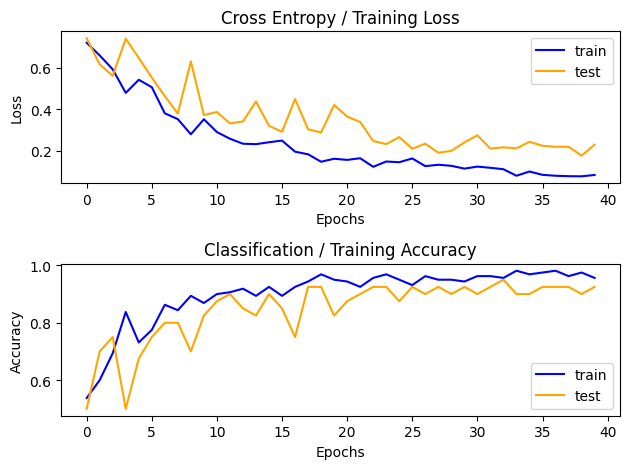

In [ ]:
model = vgg3()

train_datagen = ImageDataGenerator(rescale = 1.0/255.0, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_it = train_datagen.flow_from_directory('drive/MyDrive/koala_vs_macaw/train', class_mode = 'binary', batch_size = 8, target_size = (200, 200))
test_it = train_datagen.flow_from_directory('drive/MyDrive/koala_vs_macaw/test', class_mode = 'binary', batch_size = 8, target_size = (200, 200))

history = model.fit(train_it, validation_data = test_it, epochs = 40)
loss, acc = model.evaluate(test_it, steps = len(test_it))

print('> Testing Accuracy: %.3f' % (acc * 100.0))
print(model.summary(show_trainable = True))

summarize_diagnostics(history)
